In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('song_audio_features_2013.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
0,God's Plan,0.754,0.449,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,7,4,198.973,1
1,Perfect,0.599,0.448,-6.312,1,0.0232,0.1630,0.000000,0.106,0.168,95.050,8,3,263.400,1
2,Meant to Be (feat. Florida Georgia Line),0.643,0.783,-6.458,1,0.0856,0.0470,0.000000,0.083,0.579,154.084,10,4,163.870,1
3,Havana,0.765,0.523,-4.333,1,0.0300,0.1840,0.000036,0.132,0.394,104.988,2,4,217.307,1
4,rockstar (feat. 21 Savage),0.587,0.535,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,5,4,218.147,1


In [5]:
# Check nulls
df.isna().sum()

title               0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
key                 0
time_signature      0
duration_sec        0
hit                 0
dtype: int64

In [6]:
# Get summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1397.0,0.579830,0.159935,0.078400,0.4700,0.585000,0.69000,0.964
energy,1397.0,0.670040,0.209915,0.007260,0.5380,0.705000,0.83600,0.999
loudness,1397.0,-6.828173,3.300465,-33.350000,-8.1910,-6.038000,-4.73700,-0.818
mode,1397.0,0.662133,0.473152,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,1397.0,0.088534,0.093399,0.023200,0.0351,0.049300,0.09430,0.945
acousticness,1397.0,0.211552,0.269550,0.000003,0.0106,0.083500,0.30200,0.993
instrumentalness,1397.0,0.055459,0.175627,0.000000,0.0000,0.000007,0.00138,0.968
liveness,1397.0,0.181605,0.139363,0.021500,0.0983,0.125000,0.22400,0.992
valence,1397.0,0.460638,0.229270,0.031200,0.2770,0.452000,0.62400,0.976
tempo,1397.0,123.471594,29.885166,60.048000,99.0210,123.069000,142.68400,211.903


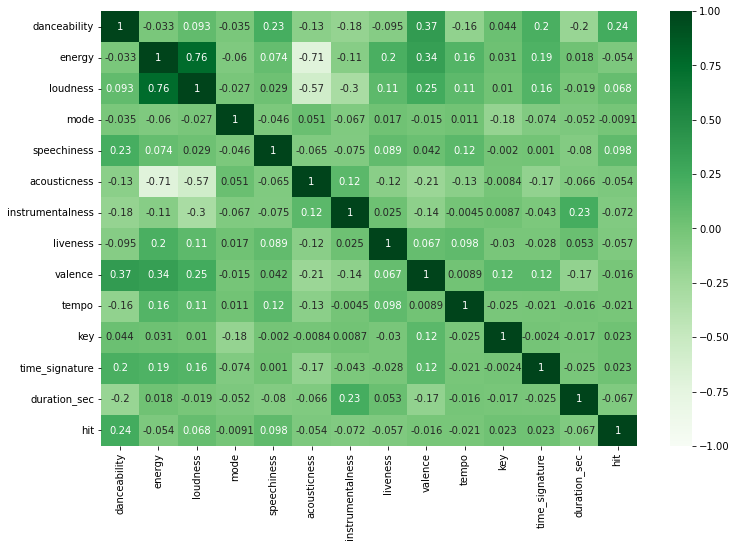

In [7]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Greens')

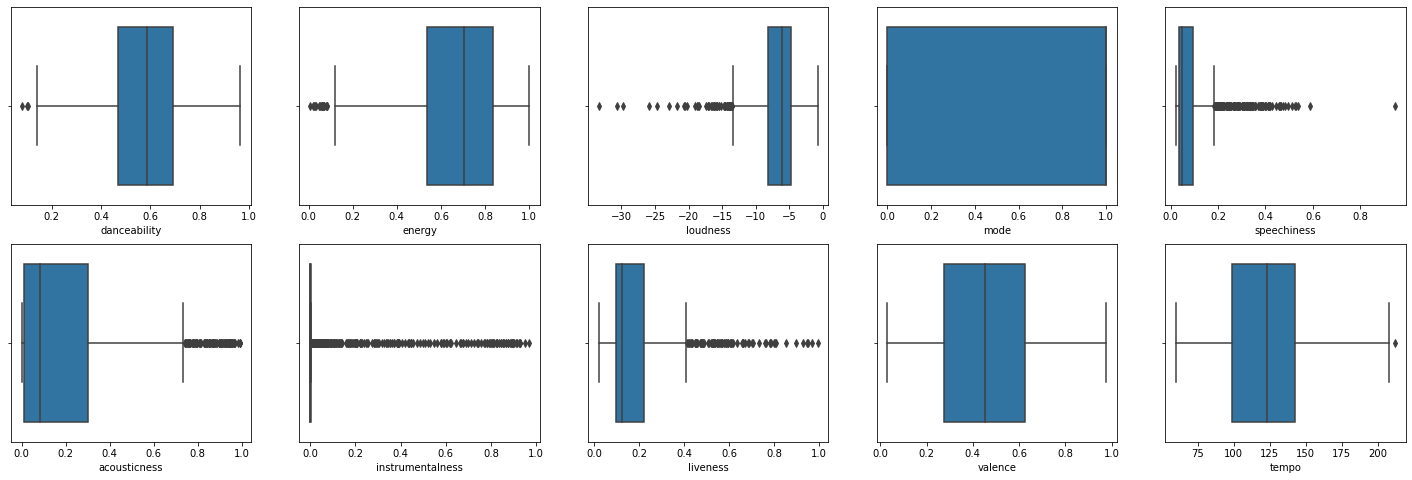

In [44]:
# Plot boxplot to identify outliers
fig, ax = plt.subplots(2,5, figsize=(25,8))
for i in range(len(df.columns.values[1:11])):
    sns.boxplot(x=df[df.columns.values[1:11][i]], 
                ax=ax[i//5, i%5])
    #ax[i//5, i%5].set_title('{}'.format(df.columns.values[1:11][i]))

In [28]:
# Danceability outliers
df[df['danceability'] <= 0.18]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
104,The Embrace,0.1410,0.00726,-16.518,0,0.0471,0.993000,0.581000,0.1010,0.0368,70.586,4,1,536.187,0
131,Always There...In Our Hearts - Individual Shuf...,0.1740,0.91200,-4.763,1,0.0427,0.573000,0.003200,0.3660,0.0661,152.248,7,4,255.867,0
288,Blood Like Cream,0.1410,0.93800,-6.452,1,0.0941,0.000005,0.202000,0.1950,0.2110,183.224,1,4,213.293,0
298,Blue Ocean Floor,0.1470,0.20400,-16.244,1,0.0515,0.786000,0.036800,0.1380,0.0781,180.856,2,4,439.467,0
334,For The Love Of A Princess,0.1700,0.06970,-25.881,0,0.0484,0.468000,0.896000,0.0851,0.0352,114.386,9,3,247.533,0
727,O Father O Satan O Sun!,0.1590,0.92800,-4.116,1,0.0668,0.000404,0.000035,0.1510,0.1800,83.385,1,4,433.440,0
749,Finished Sympathy,0.1030,0.43600,-6.644,0,0.0402,0.019100,0.000050,0.0789,0.0391,179.893,7,4,502.493,0
788,Fragment 2,0.0784,0.12300,-13.846,1,0.0433,0.957000,0.929000,0.3100,0.0348,82.372,10,3,364.080,0
789,Moments,0.1520,0.03150,-29.774,0,0.0470,0.922000,0.775000,0.1100,0.1550,139.095,6,3,215.756,0
1106,I Want The Heartbeat,0.1590,0.90600,-5.094,1,0.0834,0.000106,0.000008,0.3590,0.4720,168.380,2,4,167.960,0


In [29]:
# Energy outliers
df[df['energy'] < 0.15]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
83,Say Something,0.4070,0.14700,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,2,3,229.400,1
104,The Embrace,0.1410,0.00726,-16.518,0,0.0471,0.993,0.581000,0.1010,0.0368,70.586,4,1,536.187,0
153,Another Year Has Gone By,0.5220,0.06790,-22.955,1,0.0426,0.991,0.929000,0.1070,0.1790,74.007,4,4,247.124,0
170,Through The Eyes Of A Child,0.1980,0.06490,-16.908,1,0.0385,0.810,0.003790,0.0817,0.0402,77.814,0,4,274.413,0
196,Back When We Were Beautiful,0.4690,0.06550,-13.057,1,0.0350,0.949,0.000010,0.1350,0.1840,77.426,2,4,220.080,0
197,Backwaters,0.6160,0.08190,-13.531,0,0.0740,0.924,0.844000,0.1110,0.2600,111.564,11,3,147.300,0
257,You and Me - Piano Version,0.4310,0.13800,-11.964,0,0.0465,0.896,0.000000,0.1240,0.2560,99.144,10,4,238.490,0
276,Blackbird - Remastered 2009,0.6860,0.12700,-14.361,1,0.0342,0.754,0.000014,0.0573,0.3720,93.699,7,4,138.387,0
297,Blue Crystal Glow,0.4630,0.13400,-12.637,1,0.0319,0.941,0.000000,0.2990,0.0673,99.143,7,5,122.336,0
334,For The Love Of A Princess,0.1700,0.06970,-25.881,0,0.0484,0.468,0.896000,0.0851,0.0352,114.386,9,3,247.533,0


In [31]:
# Loudness outliers
df[df['loudness'] < -28]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
532,Speak to Me,0.592,0.0196,-33.350,1,0.0358,0.362,0.854,0.1080,0.0312,119.504,1,4,65.314,0
789,Moments,0.152,0.0315,-29.774,0,0.0470,0.922,0.775,0.1100,0.1550,139.095,6,3,215.756,0
861,Do Not Go Gentle into That Good Night,0.404,0.0535,-30.703,1,0.1810,0.939,0.298,0.0475,0.0977,147.402,5,4,99.105,0


In [33]:
# Speechiness outliers
df[df['speechiness'] > 0.6]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
785,Hard Candy and Formaldehyde,0.62,0.435,-15.95,1,0.945,0.93,0.0,0.947,0.464,110.686,6,1,247.707,0


In [35]:
# Liveness outliers
df[df['liveness'] > 0.85]

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
195,God's Great Dance Floor,0.564,0.830,-8.783,1,0.0316,0.000163,0.004970,0.926,0.523,128.007,10,4,234.280,0
317,Ghost (Live) - 8/5/17 Boston Cream,0.446,0.612,-9.990,0,0.0345,0.239000,0.617000,0.967,0.642,122.255,9,4,1245.520,0
404,Carry on Jon - Live,0.339,0.327,-17.100,0,0.0437,0.628000,0.891000,0.992,0.267,211.903,4,3,381.336,0
708,Fairweather Friends,0.189,0.800,-3.818,0,0.0931,0.011500,0.000108,0.852,0.322,187.788,11,4,223.387,0
785,Hard Candy and Formaldehyde,0.620,0.435,-15.950,1,0.9450,0.930000,0.000000,0.947,0.464,110.686,6,1,247.707,0
930,Happy on the Hey Now (A Song for Kristi) - Live,0.352,0.597,-9.506,1,0.0496,0.748000,0.000027,0.898,0.227,72.507,3,4,352.080,0
1105,"I Like It, I Love It",0.643,0.961,-5.298,1,0.0315,0.019600,0.000000,0.948,0.960,124.027,0,4,205.707,0


In [66]:
# Drop outliers
df_clean = df.loc[~(
    (df['danceability'] <= 0.18) |
    (df['energy'] < 0.15) |
    (df['loudness'] < -28) |
    (df['speechiness'] > 0.6) |
    (df['liveness'] > 0.85)), :
]
df_clean

,title,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,time_signature,duration_sec,hit
0,God's Plan,0.754,0.449,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,7,4,198.973,1
1,Perfect,0.599,0.448,-6.312,1,0.0232,0.1630,0.000000,0.106,0.168,95.050,8,3,263.400,1
2,Meant to Be (feat. Florida Georgia Line),0.643,0.783,-6.458,1,0.0856,0.0470,0.000000,0.083,0.579,154.084,10,4,163.870,1
3,Havana,0.765,0.523,-4.333,1,0.0300,0.1840,0.000036,0.132,0.394,104.988,2,4,217.307,1
4,rockstar (feat. 21 Savage),0.587,0.535,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,5,4,218.147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,Show Me Your Love,0.858,0.504,-8.717,0,0.1470,0.3980,0.000000,0.107,0.274,129.939,4,5,267.938,0
1393,Love Money Party,0.792,0.546,-7.549,1,0.0916,0.0784,0.000000,0.341,0.794,129.090,6,4,219.773,0
1394,Fake Love,0.927,0.488,-9.433,0,0.4200,0.1080,0.000000,0.196,0.605,133.987,9,4,210.937,0
1395,Love Of My Life - Remastered 2011,0.358,0.190,-11.355,1,0.0288,0.9270,0.000006,0.121,0.269,77.756,5,4,217.400,0


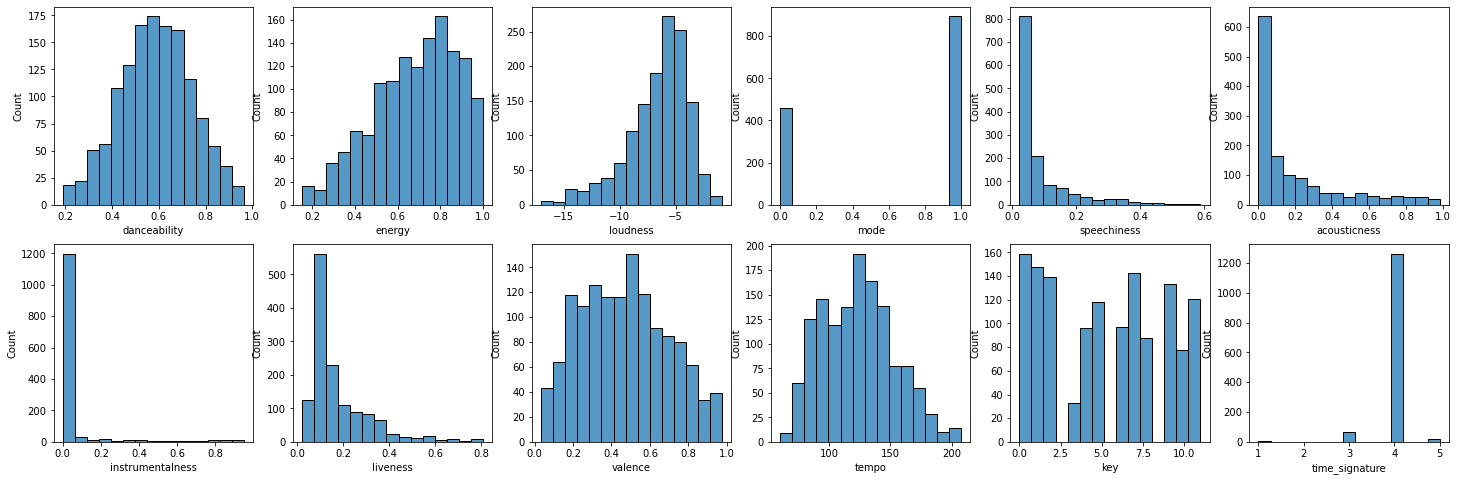

In [59]:
# Histograms of audio features for distribution comparison
fig, ax = plt.subplots(2,6, figsize=(25,8))
for i in range(len(df.columns.values[1:13])):
    sns.histplot(x=df.columns.values[1:13][i], 
                 data=df_clean,
                 ax=ax[i//6, i%6],
                 bins=15)

In [67]:
# Consider log transformation of left-skewed variable
trans_col = ['speechiness', 'acousticness','instrumentalness','liveness']
for c in trans_col:    
    df_clean['log_'+c] = np.log(df_clean[c])

/var/folders/lv/snv97l992c5ctbbxj96wt76w0000gn/T/ipykernel_70916/1916746569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_'+c] = np.log(df_clean[c])
/Users/kristallqiu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


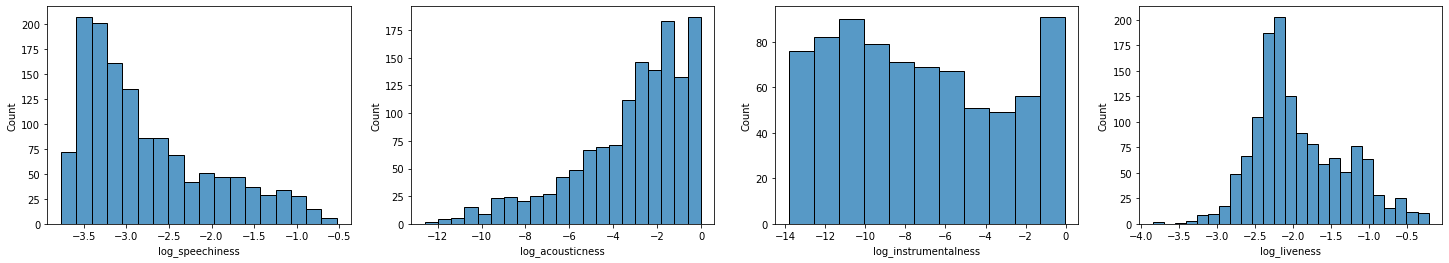

In [77]:
fig, ax = plt.subplots(1,len(trans_col), figsize=(25,4))
for i in range(len(trans_col)):
    sns.histplot(x='log_'+trans_col[i], 
                 data=df_clean,
                 ax=ax[i])

In [83]:
df.columns.values[1:13]

array(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key', 'time_signature'], dtype=object)

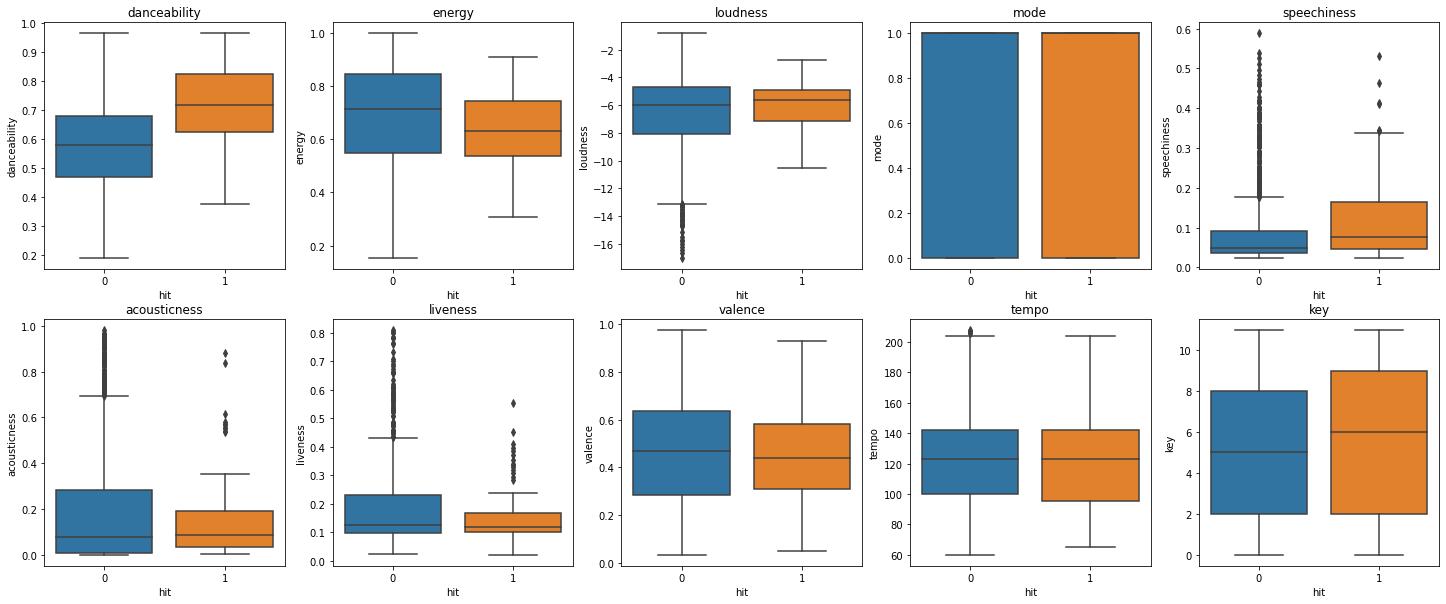

In [90]:
# Side-by-side boxplot of audio features of hit and non-hit songs
plot_var = ['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'key']

fig, ax = plt.subplots(2,5, figsize=(25,10))
for i in range(len(plot_var)):
    sns.boxplot(x='hit',
                y=plot_var[i], 
                data=df_clean,
                ax=ax[i//5, i%5]).set_title('{}'.format(plot_var[i]))